# Observations
  -  As expected, the temperature does increase the closer you get to the equator. However, if you notice the higher temps are        around the 90° N latitude. This is probably because it is summer in the northern hemisphere and winter in the southern          hemisphere. This also results in equivalent temperatures when you go further north (80°), but not as far south (-40°).
  -  The case could be made that cities closer to the equator are subjected to higher humidity, but high humidity levels are not      determined by latitude.
  -  There is no discernable correlation between cloudiness and wind speed the closer to the equator the city.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint 

# Import API key
import api_keys
api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Create dataframe for city weather data
city_weather_df = pd.DataFrame({"City": cities})

# Add new columns to hold weather data
city_weather_df["Cloudiness"] = 0
city_weather_df["Country"] = ""
city_weather_df["Date"] = 0
city_weather_df["Humidity"] = 0
city_weather_df["Lat"] = 0
city_weather_df["Lng"] = 0
city_weather_df["Max Temp"] = 0
city_weather_df["Wind Speed"] = 0

city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
608,sinegorye,0,,0,0,0,0,0,0
609,sungaipenuh,0,,0,0,0,0,0,0
610,mitchell,0,,0,0,0,0,0,0
611,elizabeth city,0,,0,0,0,0,0,0
612,namie,0,,0,0,0,0,0,0


In [21]:
#Preview Json file
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
# base_url = url + city
# response = requests.get(base_url).json()
# response

## Perform API Calls

In [22]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="


print("Begin Weather Data Retrieval      ")
print("----------------------------------")

# Iterate through rows to get weather data
for index, row in city_weather_df.iterrows():
    city = row["City"]
    base_url = url + city
    
    # Make API Requests
    response = requests.get(base_url).json()
    
    # Use try/except to skip over cities with no data
    try:
        print(f"Processing Record # {index+1} | {city}")
        print(base_url)
        city_weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_weather_df.loc[index, "Country"] = response["sys"]["country"]
        city_weather_df.loc[index, "Date"] = response["dt"]
        city_weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        city_weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        city_weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        city_weather_df.loc[index, "Max Temp"] = response["main"]["temp"]
        city_weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    
    except:
        print("Skipping...Data Not Found For " + city)
        

# Print Data loading Complete statement     
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
           

Begin Weather Data Retrieval      
----------------------------------
Processing Record # 1 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=vestmannaeyjar
Processing Record # 2 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=andenes
Skipping...Data Not Found For andenes
Processing Record # 3 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=cape town
Processing Record # 4 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=dikson
Processing Record # 5 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=port elizabeth
Processing Record # 6 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=hermanus
Pr

Processing Record # 56 | gondar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=gondar
Processing Record # 57 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bethel
Processing Record # 58 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=inhambane
Processing Record # 59 | kasangulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kasangulu
Processing Record # 60 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=guerrero negro
Processing Record # 61 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tautira
Processing Record # 62 | pearl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79

Processing Record # 112 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=evensk
Processing Record # 113 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bredasdorp
Processing Record # 114 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=souillac
Processing Record # 115 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bambous virieux
Processing Record # 116 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=port alfred
Processing Record # 117 | salihorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=salihorsk
Processing Record # 118 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record # 167 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=san cristobal
Processing Record # 168 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=walvis bay
Processing Record # 169 | kimbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kimbe
Processing Record # 170 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=carnarvon
Processing Record # 171 | angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=angoche
Processing Record # 172 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=batemans bay
Processing Record # 173 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=314

Processing Record # 221 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=hamilton
Processing Record # 222 | nova olimpia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=nova olimpia
Processing Record # 223 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=henties bay
Processing Record # 224 | ye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=ye
Skipping...Data Not Found For ye
Processing Record # 225 | birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=birjand
Processing Record # 226 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=aripuana
Processing Record # 227 | torbay
http://api.openweathermap.org/data/2.5/weather?units

Processing Record # 275 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=sinnamary
Processing Record # 276 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=alofi
Processing Record # 277 | sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=sarkand
Processing Record # 278 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bathsheba
Processing Record # 279 | mushie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=mushie
Processing Record # 280 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=port blair
Processing Record # 281 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8

Processing Record # 330 | abilene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=abilene
Processing Record # 331 | aykino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=aykino
Processing Record # 332 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=opuwo
Processing Record # 333 | ventspils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=ventspils
Processing Record # 334 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=verkhnevilyuysk
Processing Record # 335 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=hambantota
Processing Record # 336 | aksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d7

Processing Record # 385 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=okhotsk
Processing Record # 386 | plaeng yao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=plaeng yao
Processing Record # 387 | kharar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kharar
Processing Record # 388 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=dingle
Processing Record # 389 | luangwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=luangwa
Processing Record # 390 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=namatanai
Processing Record # 391 | trinidad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7

Processing Record # 440 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=ballina
Processing Record # 441 | wad madani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=wad madani
Skipping...Data Not Found For wad madani
Processing Record # 442 | tara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tara
Processing Record # 443 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=ambilobe
Processing Record # 444 | rogovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=rogovskaya
Processing Record # 445 | kemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kemi
Processing Record # 446 | lachi
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record # 494 | badou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=badou
Processing Record # 495 | camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=camopi
Processing Record # 496 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=buala
Processing Record # 497 | la rioja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=la rioja
Processing Record # 498 | san ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=san ramon
Processing Record # 499 | sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=sokoni
Processing Record # 500 | addi ugri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15

Processing Record # 548 | valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=valparaiso
Processing Record # 549 | irbeyskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=irbeyskoye
Processing Record # 550 | bien hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bien hoa
Processing Record # 551 | temerloh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=temerloh
Processing Record # 552 | tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tutoia
Processing Record # 553 | kpandae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kpandae
Processing Record # 554 | cervo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21

Processing Record # 603 | jijiga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=jijiga
Processing Record # 604 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=pangkalanbuun
Processing Record # 605 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=ukiah
Processing Record # 606 | mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=mao
Processing Record # 607 | bato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=bato
Processing Record # 608 | batsfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=batsfjord
Processing Record # 609 | sinegorye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee

In [23]:
# Remove rows(cities) with no data
city_weather_df["Date"].replace(0, np.nan, inplace=True)
city_weather_df.dropna(subset=["Date"], how="any", inplace=True)

In [24]:
# Preview appended weather dataframe
city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
608,sinegorye,92,RU,1.533784e+09,100,62.09,150.53,49.10,2.71
609,sungaipenuh,68,ID,1.533784e+09,83,-2.08,101.38,72.72,1.36
610,mitchell,1,US,1.533783e+09,69,43.71,-98.03,78.80,8.05
611,elizabeth city,1,US,1.533784e+09,74,36.30,-76.22,82.42,14.99
612,namie,75,JP,1.533783e+09,100,37.52,140.86,75.20,19.46


In [25]:
#Create csv file for weather data output
city_weather_df.to_csv("WeatherData.csv", index=False)

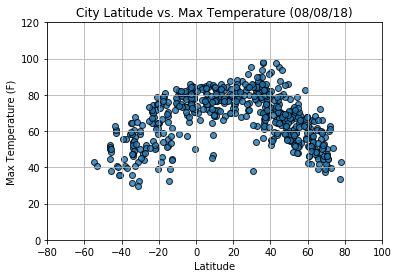

In [26]:
# Build scatterplot for latitude and temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Temp.png")

# Show plot
plt.show()

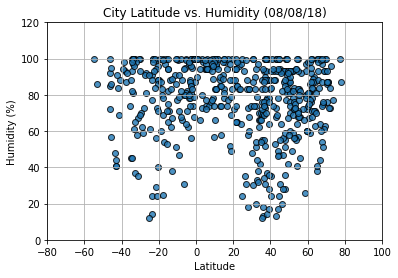

In [27]:
# Build scatterplot for latitude and humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Humid.png")

# Show plot
plt.show()

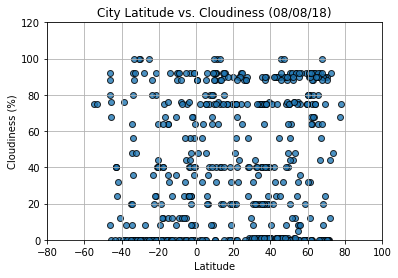

In [28]:
# Build scatterplot for latitude and cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Cloud.png")

# Show plot
plt.show()

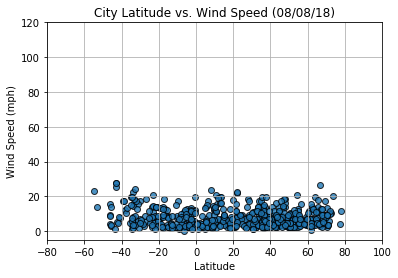

In [29]:
# Build scatterplot for latitude and wind speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(-5, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Wind.png")

# Show plot
plt.show()